In [1]:
from imports import *

### Cleaning WVS Data -- Subsetting

#### First, we will start by subsetting the huge data only into the questions and observation identifiers we are about

NOTE: We do not store our raw data for the WVS in our repository because it is so large and we cannot store it without issues. Thus, we ran the code on a local computer and just used a local path to read in the wvs raw data. This is what the path variable is for if you would like to reproduce our work. 

In [28]:
path = "/Users/abhayduggirala/Desktop/Harvard-Third-Year/CS109/cs109a-project-data/WVS_Time_Series_1981-2022_csv_v5_0.csv"

In [29]:
wvs = pd.read_csv(path)

wvs.head()

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,1,...,0.000000,0.444444,0.444444,0.33,0.0,0.165,-1.011276,0.160847,0.158964,-1.792410
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,2,...,0.111111,0.444444,0.444444,0.33,0.0,0.165,-0.688773,0.409283,0.558946,-1.208679
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,3,...,0.000000,0.444444,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,4,...,0.000000,0.333333,0.333333,0.33,0.0,0.165,-1.319863,0.733956,1.081669,-2.350952
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,5,...,0.000000,0.333333,0.333333,0.00,0.5,0.250,NaN,NaN,NaN,NaN


In [5]:
questions = ["A005", "A104", "E040", "A030", "A165", "G007_18_B", "G007_33_B", "G007_34_B", 
             "G007_35_B", "G007_36_B", "D078", "D059", "C001", "E233", "F199", "A124_02", "A124_06", "A105", "E124", "E069_40", "C002", 
             "A040", "A098", "E069_01", "F028", "F028B", "F034", "F050", "F063", "F203", "F202", "E220"]



In [6]:
# keep only the column S021, S017

wvs_subset = wvs[['S021', 'S017', 'S020', 'COUNTRY_ALPHA'] + questions]



We now only keep the data from the three most recent waves of the WVS

In [7]:
# keep if S020 >= 2005 (keep 3 most recent waves of survey data)

wvs_subset_year = wvs_subset[wvs_subset['S020'] >= 2005]

wvs_subset_year = wvs_subset_year.rename(columns={'S020': 'year', 'S017': 'weight', 'COUNTRY_ALPHA': 'country'})

In [ ]:
# we set any value that is -3 or -4 or -5 to NaN since these are missing according to the documentation. -5 means missing, -4 means not asked in survey, -3 means not applicable

wvs_subset_year = wvs_subset_year.replace([-4, -5], np.nan)

# i will set -1 and -2 (which is a "dont know response") to the mode of the column within the given country. 


# i also will set -1 or -2 to 0 since these are not missing values but rather a "don't know" or "no answer" response which we believe indicates neutrality in the response. 



In [32]:
# count the number of -1 and -2 in each column

wvs_subset_year[questions].isin([-2]).sum()

A005         1150
E040         1525
A030          412
C008            0
A165         2380
G007_18_B    1314
G007_33_B    1348
G007_34_B    1486
G007_35_B    2957
G007_36_B    2896
D078         1715
D059         1890
C001          871
E233         2377
F199         1674
A124_02       777
A124_06       872
A105         1724
E124         1697
E069_40      3000
C002         1133
A040          553
A098         1277
E069_01      1666
F028         1657
F028B        1575
F034         3084
F050          948
F063         2357
F203         2722
F202         1922
E220         2490
dtype: int64

In [40]:
# get number of -1 in each column

wvs_subset_year[questions].isin([-1]).sum()


A005          1628
E040          3993
A030           193
C008             0
A165          4476
G007_18_B     1895
G007_33_B     1455
G007_34_B     4213
G007_35_B    11372
G007_36_B    12193
D078          7943
D059          8529
C001          2824
E233          5508
F199          2047
A124_02        518
A124_06        671
A105          1609
E124          5927
E069_40      15621
C002          3279
A040           482
A098          1023
E069_01       5842
F028          2773
F028B         1421
F034          5092
F050          3662
F063          2681
F203          9074
F202         12055
E220          8964
dtype: int64

In [47]:
# get number of -1 for G007_18_B by country and year with the most missing values

wvs_subset_year[wvs_subset_year['G007_18_B'] == -1].groupby(['country', 'year']).size().sort_values(ascending=False)

# get sum of -1 for G007_18_B by country




country  year
JPN      2010    221
NLD      2022    118
JPN      2019     83
NLD      2012     78
UKR      2006     62
                ... 
USA      2017      1
BRA      2006      1
MEX      2012      1
PAK      2012      1
IDN      2018      1
Length: 118, dtype: int64

In [48]:
# get number of -1 for G007_18_B by country

wvs_subset_year[wvs_subset_year['G007_18_B'] == -1].groupby(['country']).size().sort_values(ascending=False)



country
JPN    304
NLD    226
RUS     91
UKR     80
CHN     74
      ... 
CZE      1
USA      1
MDA      1
RWA      1
EGY      1
Length: 73, dtype: int64

In [33]:
# ckec number of -5 in each column

wvs_subset_year[questions].isin([-5]).sum()

A005         1228
E040          300
A030           93
C008            0
A165            0
G007_18_B     201
G007_33_B     200
G007_34_B     243
G007_35_B     610
G007_36_B     545
D078          203
D059          206
C001          154
E233          432
F199          333
A124_02         0
A124_06         0
A105          388
E124          324
E069_40       482
C002          155
A040           94
A098          285
E069_01       438
F028          909
F028B         338
F034          480
F050          308
F063            0
F203         1429
F202          313
E220          350
dtype: int64

In [50]:
# get -5 for F203 by country

wvs_subset_year[wvs_subset_year['F203'] == -5].groupby(['country']).size().sort_values(ascending=False)

country
GBR    608
NLD    393
CZE    140
HTI     54
NZL     42
NIR     39
GRC     35
SWE     29
BRA     21
UZB     19
THA     18
CHN     10
MAC      6
SGP      4
ECU      4
IDN      2
LBY      1
KEN      1
SRB      1
TUN      1
TUR      1
dtype: int64

Not too many actual missings in dataset (given we have 300,000 observations) so it is okay to just impute them. We impute rather than drop because some coutnries have more missings than another for a given year. 

In [36]:
# check number of -4 in list

wvs_subset_year[questions].isin([-4]).sum()



A005           3025
E040           3953
A030              0
C008         268806
A165           2988
G007_18_B      8557
G007_33_B      8557
G007_34_B      8557
G007_35_B      8557
G007_36_B      8557
D078           3953
D059              0
C001           3025
E233           5289
F199          11560
A124_02        8371
A124_06       11396
A105           3953
E124          11183
E069_40        3953
C002          11531
A040              0
A098           3953
E069_01        4303
F028           4763
F028B         85907
F034           1523
F050          91512
F063           4026
F203          84744
F202          82021
E220          15178
dtype: int64

In [37]:
# check number of -4 in G007_18_B by country    

wvs_subset_year[wvs_subset_year['G007_18_B'] == -4]['country'].value_counts()


country
IRQ    2701
IRN    2667
HKG    1252
JPN    1096
NZL     841
Name: count, dtype: int64

In [39]:
# check number of responses from JPN  by year  

wvs_subset_year[wvs_subset_year['country'] == 'JPN']['year'].value_counts()

year
2010    2443
2019    1353
2005    1096
Name: count, dtype: int64

We see that we have "not asked" in some countries in a year where that question was asked to most other countries. Most of the not asked in a year where the question is asked is confined to a few countries at worst. This is good because it means when we collapse, we will have a missing value for that question and we can deal with it accordingly. 

In [51]:
# check -3 in each column

wvs_subset_year[questions].isin([-3]).sum()


A005            0
E040            0
A030            0
C008            0
A165            0
G007_18_B       8
G007_33_B      40
G007_34_B      31
G007_35_B     732
G007_36_B     512
D078            0
D059            0
C001            0
E233            0
F199            0
A124_02         0
A124_06         0
A105            0
E124            0
E069_40         0
C002            0
A040            0
A098            0
E069_01         0
F028          767
F028B           0
F034            0
F050            0
F063            0
F203         1130
F202            0
E220         1034
dtype: int64

Imputation method is just going to be hot deck imputation

- Impute for -1 (dont know), -2 (no answer), -5 (simple missing)
- leave -4 (not asked) alone because it is not asked throughout the entire country for a given year so we can do the reweighting on a case by case basis
- impute for -3 since so little each year by country and leave as missing if the entire country has not applicable and we reweight accordingly after

In [76]:
# get the number of missing in wvs_subset_year_new before imputation

wvs_subset_year.isnull().sum()



S021             0
weight           0
year             0
country          0
A005          4006
E040          5818
A030           698
C008             0
A165          6856
G007_18_B     3418
G007_33_B     3043
G007_34_B     5973
G007_35_B    15671
G007_36_B    16146
D078          9861
D059         10625
C001          3849
E233          8317
F199          4054
A124_02       1295
A124_06       1543
A105          3721
E124          7948
E069_40      19103
C002          4567
A040          1129
A098          2585
E069_01       7946
F028          6106
F028B         3334
F034          8656
F050          4918
F063          5038
F203         14355
F202         14290
E220         12838
dtype: int64

In [77]:
# get missing for A005 by country and year for wvs_subset_year_new 

wvs_subset_year_new[wvs_subset_year_new['A005'].isnull()].groupby(['country', 'year']).size().sort_values(ascending=False)



country  year
NLD      2022    340
RUS      2011    191
DEU      2006    133
JPN      2010    132
CHN      2007    126
                ... 
SGP      2012      1
KEN      2021      1
PHL      2012      1
MEX      2018      1
ZWE      2020      1
Length: 149, dtype: int64

In [78]:
# get number of NLD 2022 for A005

wvs_subset_year_new[(wvs_subset_year_new['country'] == 'NLD') & (wvs_subset_year_new['year'] == 2022)]['A005'].value_counts()

A005
2.0    1002
1.0     462
3.0     241
4.0     100
Name: count, dtype: int64

In [80]:
def hot_deck_fill(group, columns):
    for col in columns:
        # Identify the indices where the value is NaN
        missing_indices = group[col][group[col].isna()].index
        
        # If there are valid (non-NaN) values to sample from
        if not group[col].dropna().empty:
            # Sample with replacement to fill missing values
            group.loc[missing_indices, col] = np.random.choice(group[col].dropna(), size=len(missing_indices))
    
    return group

In [85]:
missing_values = [-1, -2, -3, -5] 

grouping_cols = ['country', 'year']

imputing_cols = questions

wvs_subset_year_missings = wvs_subset_year.replace(missing_values, np.nan) 

wvs_subset_year_imputed = wvs_subset_year_missings.groupby(grouping_cols).apply(lambda group: hot_deck_fill(group, imputing_cols)).reset_index(drop=True)


# get the number of missing in wvs_subset_year_new after imputation

wvs_subset_year_imputed.isnull().sum()

S021         0
weight       0
year         0
country      0
A005         0
E040         0
A030         0
C008         0
A165         0
G007_18_B    0
G007_33_B    0
G007_34_B    0
G007_35_B    0
G007_36_B    0
D078         0
D059         0
C001         0
E233         0
F199         0
A124_02      0
A124_06      0
A105         0
E124         0
E069_40      0
C002         0
A040         0
A098         0
E069_01      0
F028         0
F028B        0
F034         0
F050         0
F063         0
F203         0
F202         0
E220         0
dtype: int64

In [83]:
# get the number of missing in wvs_subset_year_imputed after imputation

# get value counts for A005 for NLD 2022 for wvs_subset_year_missings 

wvs_subset_year_missings[(wvs_subset_year_missings['country'] == 'NLD') & (wvs_subset_year_missings['year'] == 2022)]['A005'].value_counts()

A005
2.0    1002
1.0     462
3.0     241
4.0     100
Name: count, dtype: int64

In [84]:
# get value counts for A005 for NLD 2022 for wvs_subset_year_imputed

wvs_subset_year_imputed[(wvs_subset_year_imputed['country'] == 'NLD') & (wvs_subset_year_imputed['year'] == 2022)]['A005'].value_counts()

A005
2.0    1181
1.0     551
3.0     292
4.0     121
Name: count, dtype: int64

we see no more missings and the imputation appears to have worked here, now we work to collapse by year and country with the weight from the weight column. we only collapse on the questions values and take an average (weighted)

In [86]:
# set all -4 to NaN since these are not missing values but rather not asked in survey

wvs_subset_year_imputed = wvs_subset_year_imputed.replace(-4, np.nan)



In [92]:
def weighted_avg(group, value_column, weight_column='weight'):
    return np.average(group[value_column], weights=group[weight_column])


# group by country and year and then apply the weighted average to each question column

collapsed_wvs = wvs_subset_year_imputed.groupby(['country', 'year']).apply(lambda group: pd.Series({
        col: weighted_avg(group, col) for col in questions
    })).reset_index()

collapsed_wvs

,country,year,A005,E040,A030,C008,A165,G007_18_B,G007_33_B,G007_34_B,...,A098,E069_01,F028,F028B,F034,F050,F063,F203,F202,E220
0,AND,2005,1.606670,5.699576,0.600590,NaN,1.799281,2.600777,1.891247,3.111624,...,0.470194,3.148307,6.601159,NaN,1.659453,NaN,5.460695,NaN,NaN,6.156543
1,AND,2018,1.524900,4.571713,0.440239,NaN,1.744024,2.278884,1.733068,2.941235,...,0.217131,3.000000,6.499004,5.927291,1.702191,0.642430,4.747012,3.250996,3.276892,6.145418
2,ARG,2006,1.340828,4.821803,0.577411,NaN,1.822872,2.113881,1.805116,2.943082,...,0.564959,2.361126,5.063782,NaN,1.210050,NaN,8.379381,NaN,NaN,NaN
3,ARG,2013,1.576496,4.305041,0.406470,NaN,1.802596,2.110596,1.939508,2.939128,...,0.553446,2.470041,5.141662,4.370295,1.335202,0.934959,7.493540,3.155759,2.924279,6.488391
4,ARG,2017,1.489047,4.602946,0.564640,NaN,1.798059,1.998303,1.978379,2.864012,...,0.499686,2.330817,5.166069,4.248210,1.303108,0.933348,7.435186,2.980046,2.689105,6.560614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,ZAF,2006,1.304897,3.632294,0.707129,NaN,NaN,2.097739,2.004645,2.919711,...,1.334901,1.619278,3.467908,NaN,1.197653,NaN,9.125594,NaN,NaN,6.986233
178,ZAF,2013,1.625961,4.773316,0.701899,NaN,1.765999,2.086537,2.247953,2.744362,...,1.377146,1.829612,3.121252,2.806077,1.218719,0.982176,8.069840,2.276010,1.815362,6.814109
179,ZMB,2007,1.289333,3.694000,0.811333,NaN,1.887333,2.340667,2.331333,3.250667,...,1.588667,1.587333,2.716667,NaN,1.110667,NaN,9.185333,NaN,NaN,5.479333
180,ZWE,2012,1.183270,3.568443,0.760204,NaN,1.917058,2.238195,2.244685,3.289312,...,1.593722,1.555313,2.382194,2.224820,1.106489,0.993993,9.586002,3.026048,2.059569,5.347035


In [94]:
# get the number of missing in collapsed_wvs

collapsed_wvs.isnull().sum()


country        0
year           0
A005           1
E040           2
A030           0
C008         182
A165           1
G007_18_B      5
G007_33_B      5
G007_34_B      5
G007_35_B      5
G007_36_B      5
D078           2
D059           0
C001           1
E233           3
F199           6
A124_02        4
A124_06        5
A105           2
E124           7
E069_40        2
C002           7
A040           0
A098           2
E069_01        2
F028           4
F028B         59
F034           1
F050          64
F063           3
F203          58
F202          56
E220          10
dtype: int64

In [101]:
# print out entire output of value counts for countries 

pd.set_option('display.max_rows', None)

# get number of times each country appears in the dataset

collapsed_wvs['country'].value_counts()


country
ARG    3
HKG    3
NLD    3
ROU    3
RUS    3
IND    3
MYS    3
KOR    3
EGY    3
IRQ    3
THA    3
DEU    3
MEX    3
CYP    3
COL    3
CHN    3
CHL    3
JOR    3
TUR    3
BRA    3
TWN    3
UKR    3
URY    3
USA    3
JPN    3
MAR    3
AUS    3
PER    3
NGA    2
LBY    2
NZL    2
AND    2
PAK    2
PHL    2
POL    2
RWA    2
SGP    2
SRB    2
SWE    2
TTO    2
TUN    2
UZB    2
VNM    2
ZAF    2
SVN    2
LBN    2
ZWE    2
GEO    2
CAN    2
ETH    2
IDN    2
IRN    2
GHA    2
ECU    2
ESP    2
KGZ    2
GBR    2
KAZ    2
ARM    2
CZE    1
DZA    1
SVK    1
TJK    1
BOL    1
CHE    1
BLR    1
BGR    1
BGD    1
BFA    1
VEN    1
AZE    1
YEM    1
ZMB    1
EST    1
KWT    1
FIN    1
FRA    1
KEN    1
MAC    1
MDA    1
MDV    1
ITA    1
MLI    1
MMR    1
MNG    1
NIC    1
NIR    1
HUN    1
NOR    1
HTI    1
GTM    1
GRC    1
PRI    1
PSE    1
QAT    1
Name: count, dtype: int64

In [102]:
# for countries that appear less than 3 times, we will resample with replacement to get 3 observations for each country 

collapsed_wvs_resampled = collapsed_wvs.groupby('country').apply(lambda group: group.sample(n=3, replace=True)).reset_index(drop=True)



### Cleaning WVS Data -- Dealing with Missingness

There are a few types of missingness in the data we need to address in the code:

- A value of -1 for a question: This indicates a "Don't Know" response
- A value of -2 for a question: This indicates a "No Answer" response
- A value of -3 for a question: This indicates a "Not Applicable" response
- A value of -4 for a question: This indicates a "Not Asked" response (this is typically for a question that is asked in a later wave but not the wave the data is taken from so basically every observation from that wave where the question is not asked has a -4 value for the question)
- A value of -5 for a question: This indicates a "Missing/Unknown" response

We will explore each of these value types one by one to see, first, how prevelent they are, how prevelent they are by a given country (e.g. does one country just have all -2 for some reason?), and generally how the structure of the missingness occurs.

#### Don't Know Responses (-1)

In [ ]:
# first, let's get the number of -1 in each question column 

wvs_subset_year[questions].isin([-1]).sum()

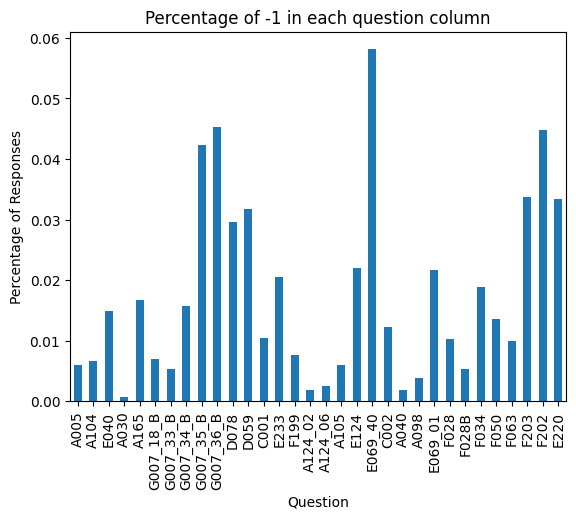

In [10]:
# now, let's get the percentage of -1 in each question column and graph it in a bar graph

wvs_subset_year[questions].isin([-1]).mean().plot(kind='bar')

plt.title('Percentage of -1 in each question column')

plt.xlabel('Question')

plt.ylabel('Percentage of Responses')

plt.show()

We see here that there is never more than 6% of our response that is a "Don't Know" response, which appears to show us that this form of missingness is not extremely consequential. However, we should look deeper and see how much is missing by country for the most missing question to see if the missingness is concentrated in certain countries and how much of a country's sampled population had this question have a -1 value. 

In [12]:
# get number of -1 for E069_40 by country and year with the most missing values

# print max rows

pd.set_option('display.max_rows', None)

wvs_subset_year[wvs_subset_year['E069_40'] == -1].groupby(['country', 'year']).size().sort_values(ascending=False)

country  year
IND      2006    858
JPN      2010    743
CHN      2007    703
         2013    635
IND      2012    629
RUS      2011    469
ROU      2005    347
IND      2023    313
GEO      2009    301
JPN      2019    300
RUS      2006    288
SGP      2020    277
EGY      2018    268
ZAF      2006    265
         2013    260
RUS      2017    255
MNG      2020    253
THA      2018    246
YEM      2014    240
NLD      2022    225
PAK      2018    218
JOR      2018    200
TUN      2013    197
UKR      2006    192
         2020    187
ARM      2011    183
LBY      2014    183
BFA      2007    169
EST      2011    165
BGD      2018    163
THA      2013    154
ROU      2018    148
TJK      2020    144
NLD      2012    141
DEU      2006    141
MAR      2011    139
BGR      2006    137
BOL      2017    130
IDN      2006    127
ROU      2012    127
TTO      2010    125
CAN      2006    117
BRA      2018    116
ETH      2020    111
POL      2005    107
ARM      2021    106
COL      2005    103

In [ ]:
# no longer print max rows

pd.set_option('display.max_rows', 10)

From the documentation for the WVS, we generally see about 1500 responses per country on average. Using this heuristic, we actually see that over half of India's responses in 2006 for this specific question are "Don't Know." This is a bigger cause for concern as it appears that for some countries, the don't know responses are concentrated within them. However, it is my opinion that I do not think for any of these questions someone responding "Don't Know" tells us something specific about this person (i.e. the missingness is not at random here). The survey is anonymous entirely and the questions are not of some nature that an individual may not want to admit to something (like cheating). As such, a "don't know" response might just mean that someone actually does not know something and as such we should feel pretty comfortable just taking data from the people who did respond. Moreover, even if you do make the argument that someone who responds "don't know" is categorically different from people who responded with something, the fact that very few countries are actually affected by this should mean that the bias in our results will remain pretty small. 

#### No Answer Responses (-2)

In [ ]:
# first, let's get the number of -2 in each question column

wvs_subset_year[questions].isin([-2]).sum()

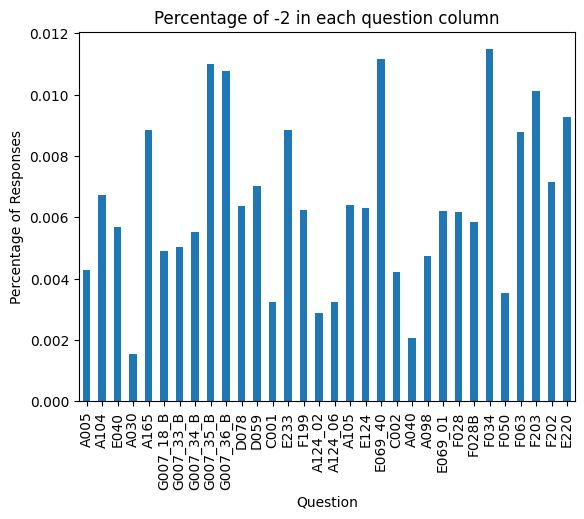

In [14]:
# now, let's get the percentage of -2 in each question column and graph it in a bar graph

wvs_subset_year[questions].isin([-2]).mean().plot(kind='bar')

plt.title('Percentage of -2 in each question column')

plt.xlabel('Question')

plt.ylabel('Percentage of Responses')

plt.show()

Here, we see that the percent of each question that is "No Answer" is not significantly larger than 1%. This is great because it means that bias stemming from the no answer respnse is likely quite low in general. Moreover, imputation is quite justifiable in this case because, similar to what I argued earlier, there likely is not reason for someone to not answer other than probably some random occurrence. None of these questions are of the nature that someone may not want to admit to someone and thus a no answer probably happens quasi-randomly (and even if it doesn't, it has a small enough impact that I do not expect it to bias our data).

#### Not Applicable Values (-3)

In [16]:
# first, let's get the number of -3 in each question column

wvs_subset_year[questions].isin([-3]).sum()


A005            0
A104            0
E040            0
A030            0
A165            0
G007_18_B       8
G007_33_B      40
G007_34_B      31
G007_35_B     732
G007_36_B     512
D078            0
D059            0
C001            0
E233            0
F199            0
A124_02         0
A124_06         0
A105            0
E124            0
E069_40         0
C002            0
A040            0
A098            0
E069_01         0
F028          767
F028B           0
F034            0
F050            0
F063            0
F203         1130
F202            0
E220         1034
dtype: int64

Text(0, 0.5, 'Percentage of Responses')

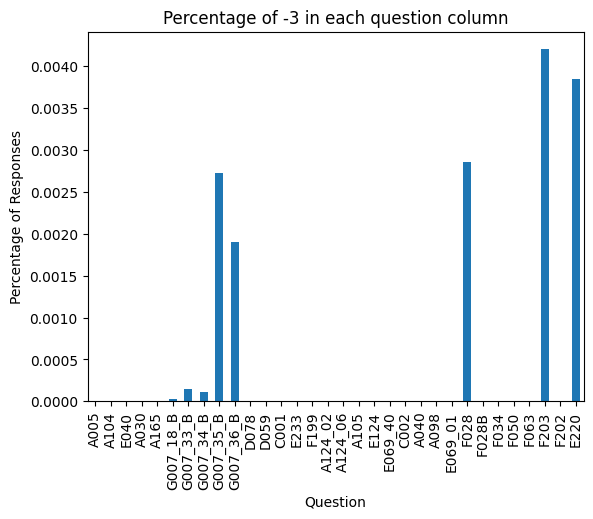

In [15]:
# now, let's get the percentage of -3 in each question column and graph it in a bar graph

wvs_subset_year[questions].isin([-3]).mean().plot(kind='bar')

plt.title('Percentage of -3 in each question column')

plt.xlabel('Question')

plt.ylabel('Percentage of Responses')

This missingness is even less prevelant than the other two types of missingness and thus imputation should be very justifiable here.

#### Not Asked Values (-4)

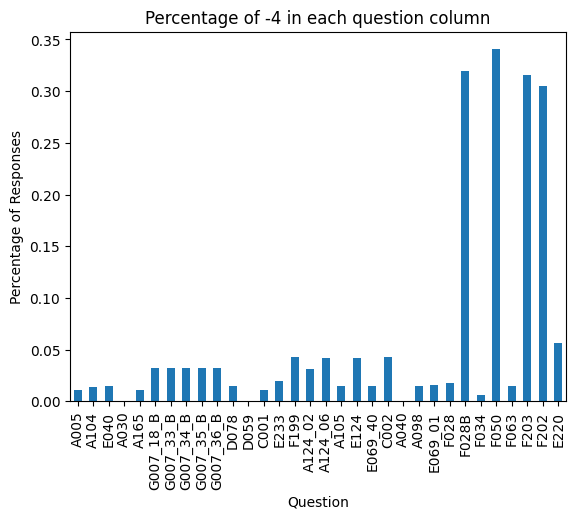

In [17]:
# get percentage of -4 in each question column

wvs_subset_year[questions].isin([-4]).mean().plot(kind='bar')

plt.title('Percentage of -4 in each question column')

plt.xlabel('Question')

plt.ylabel('Percentage of Responses')

plt.show()

The graph above is to be expected. For some of the questions, they are not asked in the least recent wave of 2005-2009 surveys. As such, we expect around 1/3 of our responses to be not asked given that one of the three waves we are taking from just does not ask the question. We can simply deal with this issue by reweighting our given index to take account for the fact that there is a missing question for a given category during a given wave. 

Now, it is more worrying that we seeing not asked values for questions that were supposed to be asked in all 3 waves. Let us now explore this a little further for a specific question.

In [19]:
# look at by country and year -4 of F199 

wvs_subset_year[wvs_subset_year['F199'] == -4].groupby(['country', 'year']).size().sort_values(ascending=False)



country  year
EGY      2008    3051
IRQ      2006    2701
GBR      2022    2609
PER      2006    1500
HKG      2005    1252
NIR      2022     447
dtype: int64

Now, after some cross reference with the number of observations by country-year from the documentation of the WVS, we see that there is a mix of just complete missingness for questions in a country when the question was supposed to be asked for the survey and cases where just some of a country's surveyed population were not asked the question. It is very reasonable to assume that for the cases where part of a country's surveyed population were not asked the question that this happened completely at random and thus imputation is okay here. For the situations where an entire country is not asked the question, we will just reweight that country's specific index value taking into account that there is a missing for that specific question in that wave. This should not have an enormously large effect on our outcome, however.

### Imputation

Given all of this analysis, we will just be imputing for our missing values (answers of -1, -2, -3, -4, -5) when we have values to impute from (true of all of the missing value codes except for -4 generally). The method of imputation that we will be sticking to is hot deck imputation discussed in class where we pick a random observation within the same country-year that answered the question to serve as our donor for the data. This is easier than using a model and we are going to focus on simplicity for now to get our dataset ready for some initial exploration. We will come back to the data and potentially use a model-based method where we use the answers to other questions within the same category to predict the value of the missing question which could be a more robust way to impute. 

In [20]:
def hot_deck_fill(group, columns):
    for col in columns:
        # Identify the indices where the value is NaN
        missing_indices = group[col][group[col].isna()].index
        
        # If there are valid (non-NaN) values to sample from
        if not group[col].dropna().empty:
            # Sample with replacement to fill missing values
            group.loc[missing_indices, col] = np.random.choice(group[col].dropna(), size=len(missing_indices))
    
    return group

In [21]:
missing_values = [-1, -2, -3, -4, -5] 

grouping_cols = ['country', 'year']

imputing_cols = questions

wvs_subset_year_missings = wvs_subset_year.replace(missing_values, np.nan) 

wvs_subset_year_imputed = wvs_subset_year_missings.groupby(grouping_cols).apply(lambda group: hot_deck_fill(group, imputing_cols)).reset_index(drop=True)


# get the number of missing in wvs_subset_year_new after imputation

wvs_subset_year_imputed.isnull().sum()

S021             0
weight           0
year             0
country          0
A005          3025
A104          3761
E040          3953
A030             0
A165          2988
G007_18_B     8557
G007_33_B     8557
G007_34_B     8557
G007_35_B     8557
G007_36_B     8557
D078          3953
D059             0
C001          3025
E233          5289
F199         11560
A124_02       8371
A124_06      11396
A105          3953
E124         11183
E069_40       3953
C002         11531
A040             0
A098          3953
E069_01       4303
F028          4763
F028B        85907
F034          1523
F050         91512
F063          4026
F203         84744
F202         82021
E220         15178
dtype: int64

#### Collapsing Data into Country-Year Obs

We now collapse the data into country-year observations using the weights given by the WVS survey organizers. This then gives us the dataset of each country year combo and the average response to each question (if it is not missing and if it is, we get a NaN)

In [22]:
def weighted_avg(group, value_column, weight_column='weight'):
    return np.average(group[value_column], weights=group[weight_column])


# group by country and year and then apply the weighted average to each question column

collapsed_wvs = wvs_subset_year_imputed.groupby(['country', 'year']).apply(lambda group: pd.Series({
        col: weighted_avg(group, col) for col in questions
    })).reset_index()

collapsed_wvs

,country,year,A005,A104,E040,A030,A165,G007_18_B,G007_33_B,G007_34_B,...,A098,E069_01,F028,F028B,F034,F050,F063,F203,F202,E220
0,AND,2005,1.610352,0.262771,5.684809,0.600590,1.798547,2.599463,1.890379,3.110660,...,0.470194,3.149487,6.612814,NaN,1.660441,NaN,5.471485,NaN,NaN,6.159808
1,AND,2018,1.524900,0.134462,4.572709,0.440239,1.744024,2.279880,1.733068,2.941235,...,0.217131,2.996016,6.495020,5.932271,1.701195,0.642430,4.762948,3.251992,3.276892,6.138446
2,ARG,2006,1.338012,0.103112,4.810948,0.577411,1.824598,2.116092,1.804023,2.954587,...,0.564959,2.355635,5.063782,NaN,1.207923,NaN,8.405745,NaN,NaN,NaN
3,ARG,2013,1.574762,0.133932,4.287645,0.406470,1.799501,2.110638,1.943523,2.943585,...,0.554533,2.460842,5.141662,4.370295,1.341795,0.929595,7.463382,3.157072,2.925640,6.536256
4,ARG,2017,1.490941,0.081887,4.635824,0.564640,1.800250,1.998897,1.978154,2.869850,...,0.499686,2.334507,5.166069,4.248210,1.298510,0.934638,7.444774,2.974127,2.697095,6.568820
5,ARM,2011,1.354487,0.033004,3.871876,0.819482,1.886773,2.163420,2.047865,3.228055,...,0.040271,1.809578,4.815872,3.714304,1.118693,0.968660,8.499245,1.765079,2.629734,6.749809
6,ARM,2021,1.318711,0.174231,4.043265,0.712640,1.914995,2.197734,2.004538,3.146723,...,0.273944,1.930028,5.352255,3.191179,1.189340,0.947178,9.134091,1.656626,2.332869,7.409937
7,AUS,2005,1.872356,0.426542,4.298625,0.485683,1.538877,2.115480,1.604236,2.626615,...,0.609505,2.698184,6.089612,NaN,1.576342,NaN,6.125831,NaN,NaN,5.331763
8,AUS,2012,1.894096,0.404892,3.894663,0.590745,1.480409,2.208315,1.631650,2.666246,...,0.568222,2.854894,6.240631,5.730421,1.745341,0.652453,5.056335,3.392683,3.246332,4.066629
9,AUS,2018,1.898954,0.403480,4.303490,0.474481,1.510359,2.150790,1.657574,2.622212,...,0.535811,2.893843,6.330185,5.788423,1.834928,0.569173,4.539739,3.400800,3.258866,4.046785


Text(0, 0.5, 'Number of Observations')

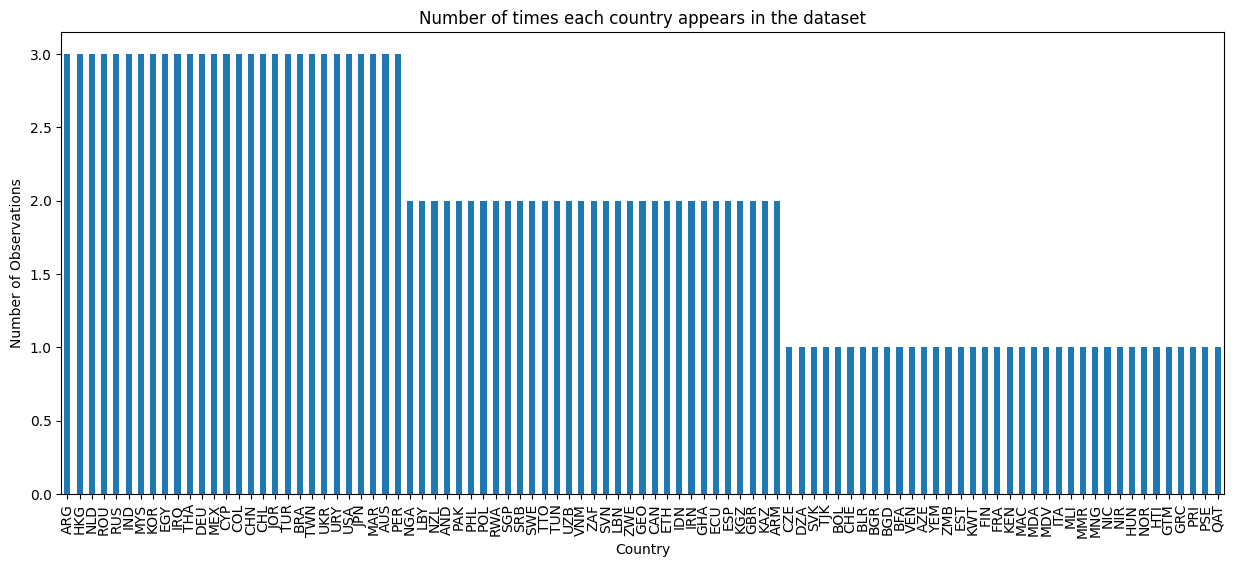

In [25]:
# bar graph of the number of times each country appears in the dataset

# make plot larger

plt.figure(figsize=(15, 6))

collapsed_wvs['country'].value_counts().plot(kind='bar')

plt.title('Number of times each country appears in the dataset')

plt.xlabel('Country')

plt.ylabel('Number of Observations')


We see that there are slightly more countries with just one observation than countries with 2 or 3 observations. We will, as discussed in Milestone 2, resample for countries that appear less than 3 times with replacement to ensure equal-weighting for each country. 

In [26]:
# for countries that appear less than 3 times, we will resample with replacement to get 3 observations for each country 

collapsed_wvs_resampled = collapsed_wvs.groupby('country').apply(lambda group: group.sample(n=3, replace=True)).reset_index(drop=True)

In [27]:
# save collapsed_wvs_resampled to csv and save collapsed_wvs to csv

collapsed_wvs_resampled.to_csv('cleaned_data/collapsed_wvs_resampled.csv', index=False)

collapsed_wvs.to_csv('cleaned_data/collapsed_wvs.csv', index=False)